In [ ]:
!pip install pandas
!pip install matplotlip
!pip install numpy
!pip install seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df =  pd.read_csv('Customer Churn.csv')
df.head

<bound method NDFrame.head of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL   

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#replacing blanks with 0 s tenure is 0

df["TotalCharges"]= df["TotalCharges"].replace(" ","0")
df["TotalCharges"]= df["TotalCharges"].astype("float")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.isnull().sum().sum()

np.int64(0)

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [14]:
df["customerID"].duplicated().sum()

np.int64(0)

In [ ]:
#converting 0 and 1 value of senior citizen  to yes/no

def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"

df['SeniorCitizen']=df["SeniorCitizen"].apply(conv)

In [19]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# as we have checked and made required changes in dataset, we can now start analyzing our data

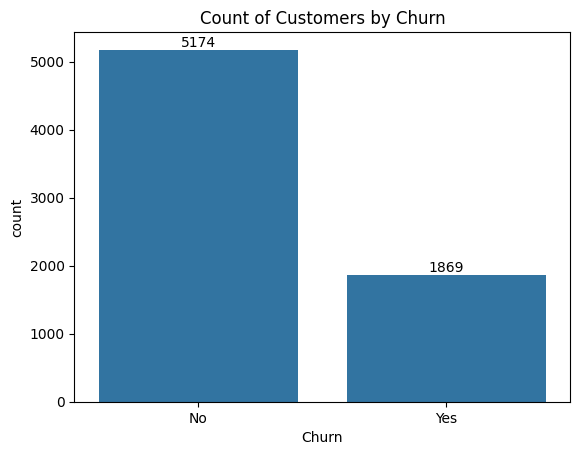

In [24]:
ax = sns.countplot(x='Churn', data = df)

ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

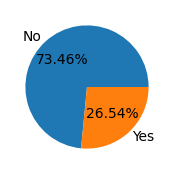

In [26]:
plt.figure(figsize=(2,2))
gb= df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.show()

In [ ]:
#26.54% of our customers have churned out 

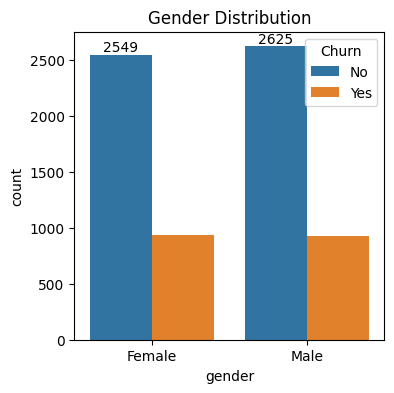

In [38]:
plt.figure(figsize= (4,4))
ax=sns.countplot(x="gender", data= df, hue = "Churn")

ax.bar_label(ax.containers[0])
plt.title("Gender Distribution")
plt.show()

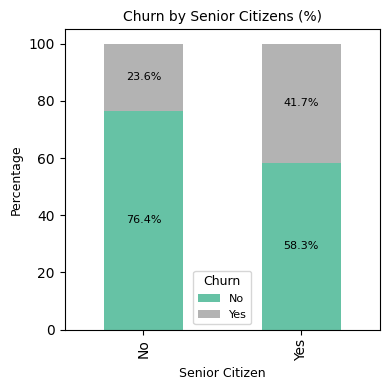

In [42]:
# Step 1: Create a crosstab of counts
ct = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Step 2: Convert counts to percentage of total per group
ct_perc = ct.div(ct.sum(axis=1), axis=0) * 100

# Step 3: Plot as stacked bar with reduced size
ax = ct_perc.plot(kind='bar', stacked=True, figsize=(4, 4), colormap='Set2')

# Step 4: Add percentage labels
for container in ax.containers:
    labels = [f'{v.get_height():.1f}%' if v.get_height() > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=8)

# Final touches
plt.title("Churn by Senior Citizens (%)", fontsize=10)
plt.xlabel("Senior Citizen", fontsize=9)
plt.ylabel("Percentage", fontsize=9)
plt.legend(title='Churn', fontsize=8, title_fontsize=9)
plt.tight_layout()
plt.show()


In [ ]:
# comparitively a greater percentage of people in senior citizen category have churned

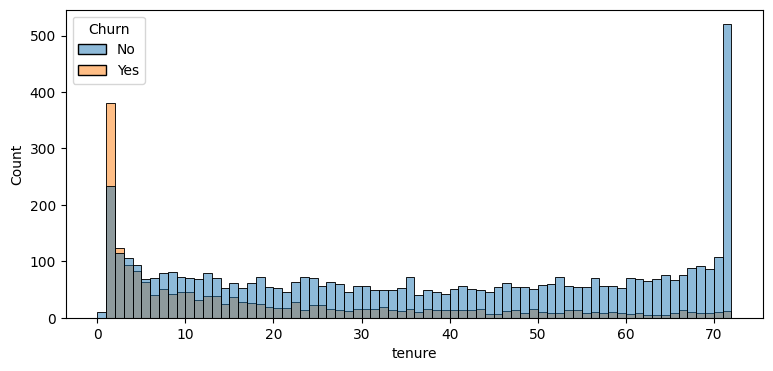

In [48]:
plt.figure(figsize= (9,4))
sns.histplot(x = "tenure", data=df, bins=72, hue ='Churn')
plt.show()

In [ ]:
#long term users hve stayed and short term users have churned

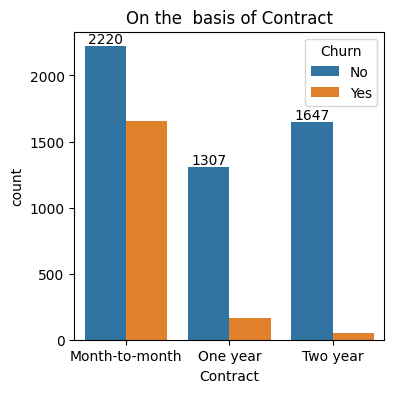

In [53]:
plt.figure(figsize= (4,4))
ax=sns.countplot(x="Contract", data= df, hue = 'Churn')

ax.bar_label(ax.containers[0])
plt.title("On the  basis of Contract")
plt.show()

In [ ]:
# people who have month to month contract are more likely to churn
# we need to convince people for long term contracts

In [54]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

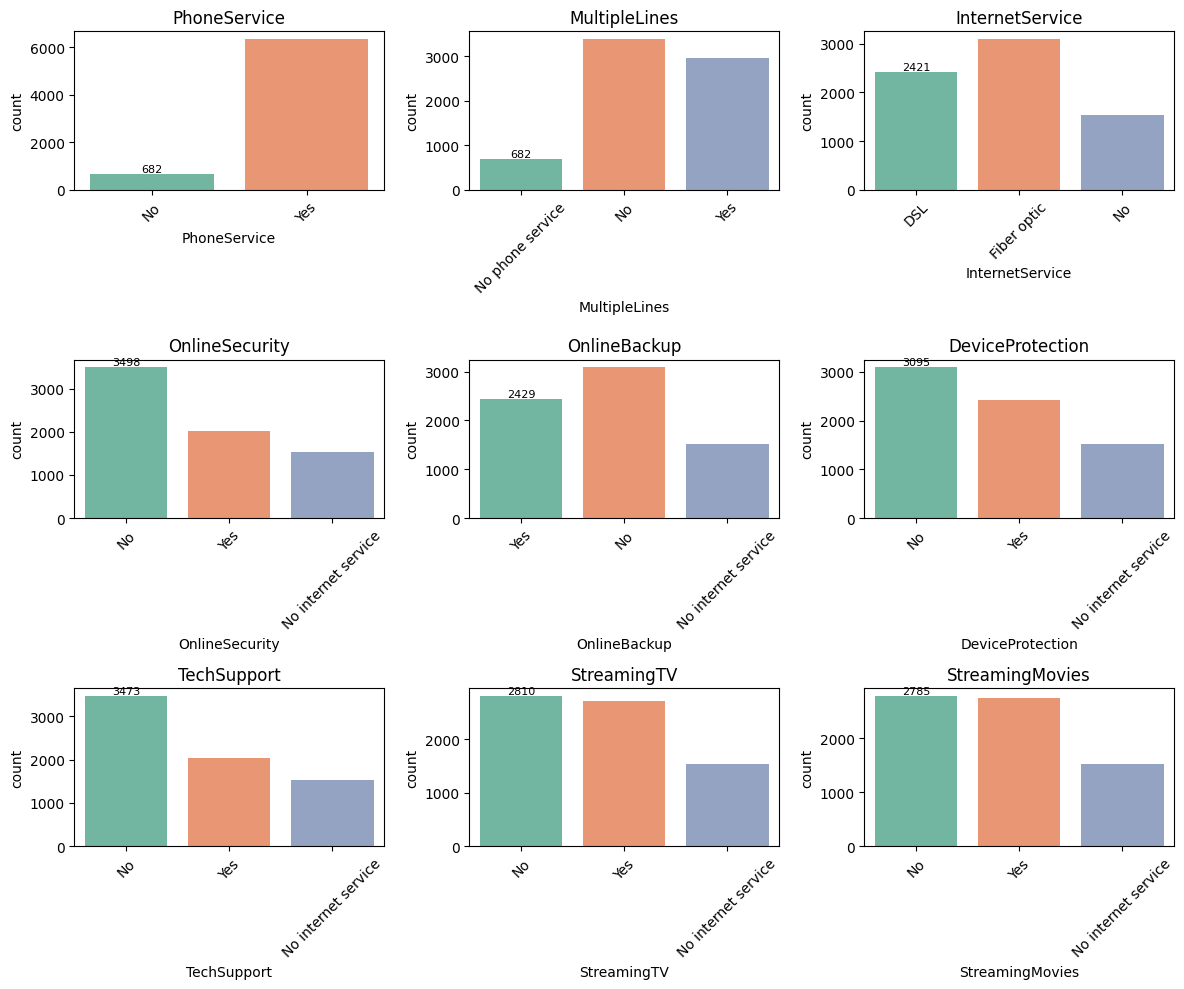

In [58]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# List of columns to plot
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))
axes = axes.flatten()

# Plot each column
for i, col in enumerate(cols):
    ax = axes[i]
    sns.countplot(data=df, x=col, ax=ax, palette='Set2')
    ax.set_title(col)
    ax.tick_params(axis='x', rotation=45)
    ax.bar_label(ax.containers[0], fontsize=8)

# Adjust layout and show only the plots
plt.tight_layout()
plt.show()


In [ ]:
#The visualizations reveal that a majority of customers use PhoneService and have Fiber optic or DSL InternetService. However, most customers have not opted for additional services like OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport. Streaming services like StreamingTV and StreamingMovies show relatively balanced usage between "Yes" and "No", with a notable portion not having internet service. These patterns suggest customers may be prioritizing core services while avoiding optional add-ons.